In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
bhk=[]
cost=[]
name=[]
status=[]
area=[]
place=[]
date=[]
perft=[]
type=[]
for i in range(1,40):
    link=f"""https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1699893373150&page={i}"""
    page = requests.get(link)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    for x in soup.find_all('div', attrs={'class':'infoWrap'}):
        flat = x.find('span', attrs = {'class':'val'})
        price = x.find('td', attrs = {'class':'price'})
        na = x.find('a', attrs = {'class':'projName'})
        st = x.find('td', attrs = {'class':'val'})
        ar=x.find('td', attrs = {'class':'size'})
        pl=x.find('span', attrs = {'class':'locName'})
        da=x.find('li', attrs = {'class':'keypoint'})
        ty=x.find('ul', attrs = {'class':'listing-details'})
        pft=x.find('td',attrs={'class':'lbl rate'})
        typ=x.find('span',attrs={'class':'Apartment'})
        
        if flat is None:
            bhk.append(np.NaN)
        else:
            bhk.append(flat.text)
        if price is None:
            cost.append(np.NaN)
        else:
            cost.append(price.text)
        if na is None:
            name.append(np.NaN)
        else:
            name.append(na.text)
        if st is None:
            status.append(np.NaN)
        else:
            status.append(st.text)
        if ar is None:
            area.append(np.NaN)
        else:
            area.append(ar.text)
        if pl is None:
            place.append(np.NaN)
        else:
            place.append(pl.text)
        if da is None:
            date.append(np.NaN)
        else:
            date.append(da.text)
        if pft is None:
            perft.append(np.NaN)
        else:
            perft.append(pft.text)
        if typ is None:
            type.append(np.NaN)
        else:
            type.append(typ.text)


In [164]:
df=pd.DataFrame({'Name':name,'BHK':bhk,'Area':area,'Cost':cost,'Status':status,'Cost per ft':perft,'Place':place,'Date':date})

In [165]:
df

,Name,BHK,Area,Cost,Status,Cost per ft,Place,Date
0,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,"7,500 / sq ft","Malkajgiri, Hyderabad",Possession by Nov 2023
1,Omsree Gallaxy,3,1376,86.65 L,Under Construction,"6,302 / sq ft","Gundlapochampally, Hyderabad",Possession by May 2027
2,Risinia The Twinz,2,1375,75.62 L,Under Construction,"5,500 / sq ft","Bowrampet, Hyderabad",Possession by Nov 2026
3,RV Vijay RV s Sai Vanamali,3,1967,1.27 Cr,Under Construction,"6,500 / sq ft","Miyapur, Hyderabad",Possession by Nov 2024
4,Cybercity Oriana,3,1480,1.28 Cr,Under Construction,"8,699 / sq ft","Kukatpally, Hyderabad",Possession by Nov 2025
...,...,...,...,...,...,...,...,...
775,Indis PBEL City,3,1976,1.6 Cr,Under Construction,"8,097 / sq ft","Appa Junction Peerancheru, Hyderabad",3 Bathrooms
776,NaN,2,1200,54 L,Ready to move,"4,500 / sq ft","Pragathi Nagar Kukatpally, Hyderabad",6 - 7 years old
777,NaN,2,1260,80 L,Under Construction,"6,349 / sq ft","Gajularamaram, Hyderabad",2 Bathrooms
778,NaN,2,1045,44.93 L,Ready to move,"4,300 / sq ft","Aminpur, Hyderabad",2 Bathrooms


In [15]:
df['Date'].value_counts()

Possession by Nov 2024    71
Possession by Nov 2023    64
0 - 1 year old            61
2 Bathrooms               53
Possession by Nov 2025    48
6 - 7 years old           46
Possession by Nov 2027    42
3 Bathrooms               42
Possession by May 2027    35
Possession by Sep 2026    29
Possession by Dec 2025    27
Possession by Nov 2026    26
Possession by Apr 2024    24
1 - 2 years old           22
3 - 4 years old           19
Possession by May 2023    18
Possession by Feb 2024    16
2 - 3 years old           15
Possession by Feb 2026    14
Possession by Aug 2025    12
2 open sides              11
4 - 5 years old            7
4 Bathrooms                6
Possession by Dec 2024     6
Resale                     6
1 open sides               6
Possession by Oct 2023     6
Possession by May 2025     5
Possession by Jun 2025     4
5 - 6 years old            3
Possession by Aug 2024     3
6 Bathrooms                2
9 Bathrooms                2
7 - 8 years old            2
Possession by 

In [17]:
df.drop('Date',axis=1,inplace=True)

In [18]:
df.head()

,Name,BHK,Area,Cost,Status,Cost per ft,Place
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,"7,200 / sq ft","Attapur, Hyderabad"
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,"7,500 / sq ft","Malkajgiri, Hyderabad"
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,"6,302 / sq ft","Gundlapochampally, Hyderabad"
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,"9,003 / sq ft","Nanakramguda, Hyderabad"
4,Elemental Village,4,1930,1.48 Cr,Under Construction,"7,700 / sq ft","Patancheru, Hyderabad"


In [27]:
df['Place']=df['Place'].apply(lambda x:x.split(',')[0])

In [28]:
df

,Name,BHK,Area,Cost,Status,Cost per ft,Place
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,"7,200 / sq ft",Attapur
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,"7,500 / sq ft",Malkajgiri
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,"6,302 / sq ft",Gundlapochampally
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,"9,003 / sq ft",Nanakramguda
4,Elemental Village,4,1930,1.48 Cr,Under Construction,"7,700 / sq ft",Patancheru
...,...,...,...,...,...,...,...
775,NaN,2,1035,47 L,Under Construction,"4,541 / sq ft",Chandanagar
776,NaN,2,1080,64 L,Ready to move,"5,925 / sq ft",Malkajgiri
777,NaN,2,1215,72 L,Under Construction,"5,925 / sq ft",Miyapur
778,Mantoor Nandan Serenity,3,2100,1.68 Cr,Ready to move,"8,000 / sq ft",Velmala


In [ ]:
a=9,181/sq ft

In [29]:
df['try']=df['Cost per ft'].apply(lambda x:re.sub("[A-z /,]","",x))

In [30]:
df['try']

0      7200
1      7500
2      6302
3      9003
4      7700
       ... 
775    4541
776    5925
777    5925
778    8000
779    9181
Name: try, Length: 780, dtype: object

In [32]:
df

,Name,BHK,Area,Cost,Status,Cost per ft,Place,try
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,"7,200 / sq ft",Attapur,7200
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,"7,500 / sq ft",Malkajgiri,7500
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,"6,302 / sq ft",Gundlapochampally,6302
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,"9,003 / sq ft",Nanakramguda,9003
4,Elemental Village,4,1930,1.48 Cr,Under Construction,"7,700 / sq ft",Patancheru,7700
...,...,...,...,...,...,...,...,...
775,NaN,2,1035,47 L,Under Construction,"4,541 / sq ft",Chandanagar,4541
776,NaN,2,1080,64 L,Ready to move,"5,925 / sq ft",Malkajgiri,5925
777,NaN,2,1215,72 L,Under Construction,"5,925 / sq ft",Miyapur,5925
778,Mantoor Nandan Serenity,3,2100,1.68 Cr,Ready to move,"8,000 / sq ft",Velmala,8000


In [54]:
def extract(x):
    if "Cr" in x:
        return float(x.split()[0])*100
    else:
        return float(x.split()[0])



In [55]:
df["lakh"]=df['Cost'].apply(extract)

In [57]:
np.round(df["lakh"],0)

0      150.0
1      168.0
2       87.0
3      168.0
4      148.0
       ...  
775     47.0
776     64.0
777     72.0
778    168.0
779    110.0
Name: lakh, Length: 780, dtype: float64

In [58]:
df

,Name,BHK,Area,Cost,Status,Cost per ft,Place,try,Cost in lakhs,lakh
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,"7,200 / sq ft",Attapur,7200,0.02,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,"7,500 / sq ft",Malkajgiri,7500,0.02,168.00
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,"6,302 / sq ft",Gundlapochampally,6302,86.65,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,"9,003 / sq ft",Nanakramguda,9003,0.02,168.00
4,Elemental Village,4,1930,1.48 Cr,Under Construction,"7,700 / sq ft",Patancheru,7700,0.01,148.00
...,...,...,...,...,...,...,...,...,...,...
775,NaN,2,1035,47 L,Under Construction,"4,541 / sq ft",Chandanagar,4541,47.00,47.00
776,NaN,2,1080,64 L,Ready to move,"5,925 / sq ft",Malkajgiri,5925,64.00,64.00
777,NaN,2,1215,72 L,Under Construction,"5,925 / sq ft",Miyapur,5925,72.00,72.00
778,Mantoor Nandan Serenity,3,2100,1.68 Cr,Ready to move,"8,000 / sq ft",Velmala,8000,0.02,168.00


In [70]:
df['BHK']=df["BHK"].astype('int')

In [71]:
df.dtypes

Name              object
BHK                int32
Area               int32
Cost              object
Status            object
Cost per ft       object
Place             object
try               object
Cost in lakhs    float64
lakh             float64
dtype: object

In [68]:
df['Area']=df['Area'].astype('int')

In [74]:
df.drop(['Cost per ft','Cost in lakhs'],axis=1,inplace=True)

In [75]:
df.head()

,Name,BHK,Area,Cost,Status,Place,try,lakh
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,1.48 Cr,Under Construction,Patancheru,7700,148.00


In [76]:
df.rename(columns={'try':'Cost per ft','lakh':'Total Cost in Lakhs','Area':'Area in Sqft'},inplace=True)

In [77]:
df.head()

,Name,BHK,Area in Sqft,Cost,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,1.5 Cr,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,1.68 Cr,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,86.65 L,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,1.68 Cr,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,1.48 Cr,Under Construction,Patancheru,7700,148.00


In [78]:
df.drop(['Cost'],axis=1,inplace=True)

In [79]:
df

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00
...,...,...,...,...,...,...,...
775,NaN,2,1035,Under Construction,Chandanagar,4541,47.00
776,NaN,2,1080,Ready to move,Malkajgiri,5925,64.00
777,NaN,2,1215,Under Construction,Miyapur,5925,72.00
778,Mantoor Nandan Serenity,3,2100,Ready to move,Velmala,8000,168.00


In [80]:
df.dtypes

Name                    object
BHK                      int32
Area in Sqft             int32
Status                  object
Place                   object
Cost per ft             object
Total Cost in Lakhs    float64
dtype: object

In [84]:
df['Cost per ft']=df['Cost per ft'].astype('int')
df.head()

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00


In [85]:
df.isnull().sum()

Name                   145
BHK                      0
Area in Sqft             0
Status                   0
Place                    0
Cost per ft              0
Total Cost in Lakhs      0
dtype: int64

In [88]:
df=df.dropna()

In [89]:
df.isnull().sum()

Name                   0
BHK                    0
Area in Sqft           0
Status                 0
Place                  0
Cost per ft            0
Total Cost in Lakhs    0
dtype: int64

In [93]:
df=df.reset_index(drop=True)

In [94]:
df

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00
...,...,...,...,...,...,...,...
630,Shree Anurag Sri Sai Anurag New Town Phase 2,2,843,Ready to move,Thumkunta,4744,40.00
631,Bhuvanteza Happy Homes II,2,1200,Under Construction,Shamirpet,2583,31.00
632,Indis PBEL City,3,1976,Under Construction,Appa Junction Peerancheru,8097,160.00
633,Mantoor Nandan Serenity,3,2100,Ready to move,Velmala,8000,168.00


In [95]:
df.duplicated().sum()

175

In [99]:
df=df.drop_duplicates().reset_index(drop=True)

In [100]:
df

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00
...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,2,843,Ready to move,Thumkunta,4744,40.00
456,Bhuvanteza Happy Homes II,2,1200,Under Construction,Shamirpet,2583,31.00
457,Indis PBEL City,3,1976,Under Construction,Appa Junction Peerancheru,8097,160.00
458,Mantoor Nandan Serenity,3,2100,Ready to move,Velmala,8000,168.00


In [102]:
df.duplicated().sum()

0

In [103]:
df.isnull().sum()

Name                   0
BHK                    0
Area in Sqft           0
Status                 0
Place                  0
Cost per ft            0
Total Cost in Lakhs    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 460 non-null    object 
 1   BHK                  460 non-null    int32  
 2   Area in Sqft         460 non-null    int32  
 3   Status               460 non-null    object 
 4   Place                460 non-null    object 
 5   Cost per ft          460 non-null    int32  
 6   Total Cost in Lakhs  460 non-null    float64
dtypes: float64(1), int32(3), object(3)
memory usage: 19.9+ KB


In [65]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

In [71]:
col=['Name','Place','BHK','Area in Sqft','Cost per ft','Total Cost in Lakhs','Status','Cost_status']
df=df[col]
df.head()

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,Average_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,Average_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,Cheap
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,Average_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,Average_price


In [114]:
df.to_csv('Makaan_data',index=False)

In [3]:
df=pd.read_csv("Makaan_data")

In [4]:
df.columns

Index(['Name', 'Place', 'BHK', 'Area in Sqft', 'Cost per ft',
       'Total Cost in Lakhs', 'Status', 'Cost_status'],
      dtype='object')

In [5]:
df

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price
...,...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,Thumkunta,2,843,4744,40,Ready to move,low_price
456,Bhuvanteza Happy Homes II,Shamirpet,2,1200,2583,31,Under Construction,low_price
457,Indis PBEL City,Appa Junction Peerancheru,3,1976,8097,160,Under Construction,high_price
458,Mantoor Nandan Serenity,Velmala,3,2100,8000,168,Ready to move,high_price


In [58]:
df['Total Cost in Lakhs']=df['Total Cost in Lakhs'].astype('int32')

In [91]:
df['BHK'].value_counts()

3    308
2     74
4     54
5     18
1      6
Name: BHK, dtype: int64

In [25]:
df['Status'].value_counts()

Under Construction    308
Ready to move          80
New                    71
Resale                  1
Name: Status, dtype: int64

In [24]:
df['Place'].value_counts()

Hitech City     43
Manikonda       39
Jeedimetla      29
Sadashivpet     26
Attapur         23
                ..
Nizampet         1
Ameenpur         1
Habsiguda        1
Sanath Nagar     1
Kondapur         1
Name: Place, Length: 67, dtype: int64

In [147]:
df.groupby('Place')['BHK'].sum()

Place
Adibatla                      8
Amberpet                      4
Ameenpur                      2
Appa Junction Peerancheru     3
Aroor                        39
                             ..
Thumkunta                     2
Turkayamjal                   5
Uppal Kalan                   6
Velmala                      10
Yapral                       10
Name: BHK, Length: 67, dtype: int64

In [22]:
df.groupby(['Place','Status'])['BHK'].sum()

Place                      Status            
Adibatla                   Under Construction     8
Amberpet                   Ready to move          2
                           Under Construction     2
Ameenpur                   Ready to move          2
Appa Junction Peerancheru  Under Construction     3
                                                 ..
Turkayamjal                Ready to move          5
Uppal Kalan                Ready to move          6
Velmala                    Ready to move          3
                           Under Construction     7
Yapral                     Under Construction    10
Name: BHK, Length: 81, dtype: int64

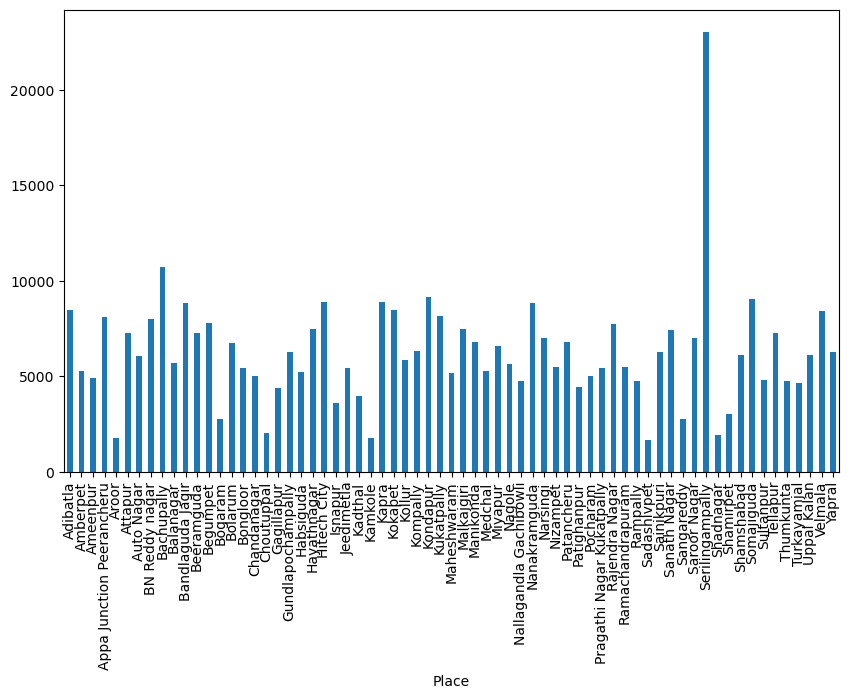

In [150]:
plt.figure(figsize=(10,6))
df.groupby('Place')['Cost per ft'].mean().plot(kind='bar')
plt.show()

In [86]:
#average cost per ft place wise
df.groupby('Place')['Cost per ft'].mean().sort_values(ascending=False)

Place
Serilingampally    23046.000000
Bachupally         10751.888889
Kondapur            9181.000000
Somajiguda          9063.000000
Hitech City         8905.767442
                       ...     
Choutuppal          2039.000000
Shadnagar           1939.000000
Aroor               1786.769231
Kamkole             1777.000000
Sadashivpet         1657.846154
Name: Cost per ft, Length: 67, dtype: float64

In [ ]:
#construction status as place wise

In [117]:
df.groupby(['Place','Status'])['Status'].count()

Place                      Status            
Adibatla                   Under Construction    2
Amberpet                   Ready to move         1
                           Under Construction    1
Ameenpur                   Ready to move         1
Appa Junction Peerancheru  Under Construction    1
                                                ..
Turkayamjal                Ready to move         2
Uppal Kalan                Ready to move         2
Velmala                    Ready to move         1
                           Under Construction    2
Yapral                     Under Construction    4
Name: Status, Length: 81, dtype: int64

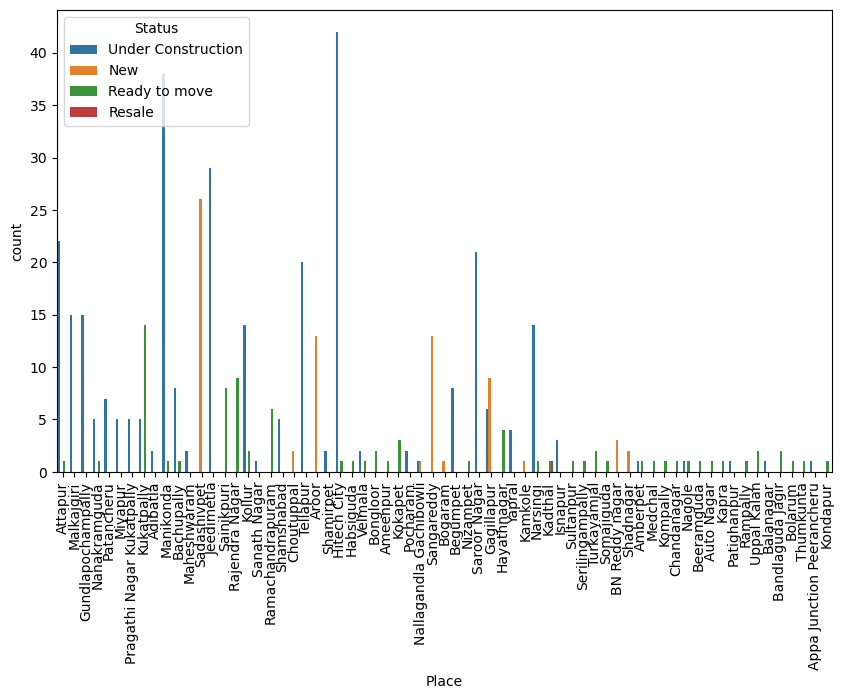

In [119]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Place',hue='Status',data=df)
plt.show()

In [43]:
#Average total cost in lakhs
df['Total Cost in Lakhs'].describe()

count     460.000000
mean      150.708457
std       123.912094
min        21.190000
25%        80.995000
50%       124.000000
75%       172.000000
max      1498.000000
Name: Total Cost in Lakhs, dtype: float64

df['Cost_status']=pd.cut(df['Total Cost in Lakhs'],bins=[20,75,120,200,df['Total Cost in Lakhs'].max()])

In [112]:
df['Cost_status']=pd.cut(df['Total Cost in Lakhs'],bins=[20,75,120,200,df['Total Cost in Lakhs'].max()],labels=['low_price','average_price','high_price','very_high_price'])

In [113]:
df

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price
...,...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,Thumkunta,2,843,4744,40,Ready to move,low_price
456,Bhuvanteza Happy Homes II,Shamirpet,2,1200,2583,31,Under Construction,low_price
457,Indis PBEL City,Appa Junction Peerancheru,3,1976,8097,160,Under Construction,high_price
458,Mantoor Nandan Serenity,Velmala,3,2100,8000,168,Ready to move,high_price


In [120]:
df.groupby(['Place','Cost_status'])['Cost_status'].count()

Place                      Cost_status    
Adibatla                   very_high_price     2
Amberpet                   low_price           2
Ameenpur                   low_price           1
Appa Junction Peerancheru  high_price          1
Aroor                      low_price          13
                                              ..
Uppal Kalan                average_price       2
Velmala                    high_price          2
                           very_high_price     1
Yapral                     average_price       3
                           high_price          1
Name: Cost_status, Length: 109, dtype: int64

In [121]:
df['Cost_status'].value_counts()

high_price         154
average_price      117
low_price          104
very_high_price     85
Name: Cost_status, dtype: int64

In [54]:
df.head()

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs,Cost_status
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00,Average_price
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00,Average_price
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65,Cheap
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00,Average_price
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00,Average_price


In [53]:
df['Place'].nunique()

67

In [62]:
#average cost per ft for status of BHK type`
df.groupby(['Status','BHK'])['Cost per ft'].mean()

Status              BHK
New                 1       5671.000000
                    2       8009.000000
                    3       2121.984848
Ready to move       1       8408.000000
                    2       6300.227273
                    3       7221.714286
                    4       6825.923077
                    5      23046.000000
Resale              3        205.000000
Under Construction  2       5882.294118
                    3       7007.773869
                    4       8670.585366
                    5       8052.411765
Name: Cost per ft, dtype: float64

In [122]:
df.head()

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price


In [123]:
#what is the average of area for each BHK type
df.groupby('BHK')['Area in Sqft'].mean()

BHK
1    2425.000000
2    1274.554054
3    2088.032468
4    3575.703704
5    5766.833333
Name: Area in Sqft, dtype: float64

In [124]:
#more cheap houses in which place
df.groupby(['Place','Cost_status'])['Cost_status'].count().sort_values(ascending=False)

Place        Cost_status    
Hitech City  very_high_price    39
Jeedimetla   average_price      25
Sadashivpet  low_price          24
Manikonda    high_price         23
Attapur      high_price         18
                                ..
Hayathnagar  very_high_price     1
Habsiguda    low_price           1
Choutuppal   low_price           1
             average_price       1
Yapral       high_price          1
Name: Cost_status, Length: 109, dtype: int64

In [125]:
pd.crosstab(df['Place'],df['Cost_status'])

Cost_status,average_price,high_price,low_price,very_high_price
Place,,,,
Adibatla,0,0,0,2
Amberpet,0,0,2,0
Ameenpur,0,0,1,0
Appa Junction Peerancheru,0,1,0,0
Aroor,0,0,13,0
...,...,...,...,...
Thumkunta,0,0,1,0
Turkayamjal,0,0,2,0
Uppal Kalan,2,0,0,0


#what is the minimum cost of 3BHK
df['BHK'==3]&(df['Total Cost in Lakhs'])


In [64]:
df.groupby('BHK')['Total Cost in Lakhs'].min()

BHK
1     33.99
2     31.00
3     21.19
4     55.00
5    360.00
Name: Total Cost in Lakhs, dtype: float64

In [66]:
df

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs,Cost_status
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.00,Average_price
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.00,Average_price
2,Omsree Gallaxy,3,1376,Under Construction,Gundlapochampally,6302,86.65,Cheap
3,Pioneer Developers Hyderabad ASBL Loft,3,1870,Under Construction,Nanakramguda,9003,168.00,Average_price
4,Elemental Village,4,1930,Under Construction,Patancheru,7700,148.00,Average_price
...,...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,2,843,Ready to move,Thumkunta,4744,40.00,veryCheap
456,Bhuvanteza Happy Homes II,2,1200,Under Construction,Shamirpet,2583,31.00,veryCheap
457,Indis PBEL City,3,1976,Under Construction,Appa Junction Peerancheru,8097,160.00,Average_price
458,Mantoor Nandan Serenity,3,2100,Ready to move,Velmala,8000,168.00,Average_price


In [67]:
df['Name'].nunique()

102

In [14]:
df['BHK'].value_counts()

3    308
2     74
4     54
5     18
1      6
Name: BHK, dtype: int64

In [21]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

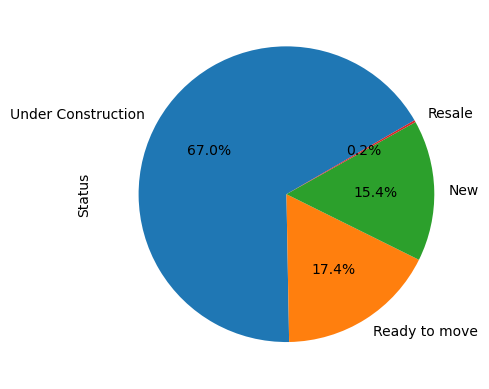

In [126]:
#Pie chart to know about the percentages of different stages in status 
df['Status'].value_counts().plot.pie(autopct="%1.1f%%", startangle=30)
plt.show()

In [33]:
df.head(2)`

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs,Cost_status
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.0,Average_price
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.0,Average_price


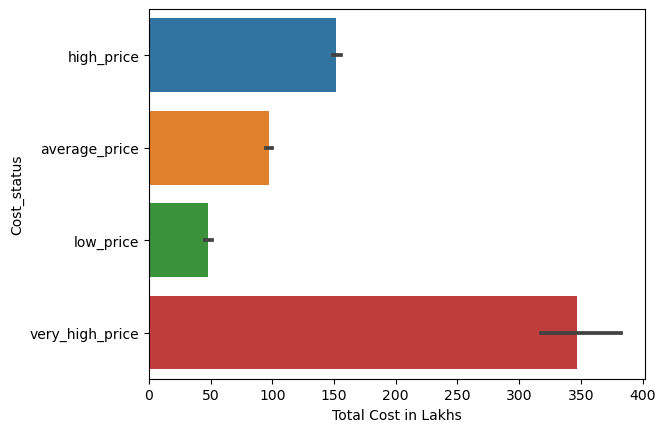

In [128]:
sns.barplot(x='Total Cost in Lakhs',y='Cost_status',data=df)
plt.show()

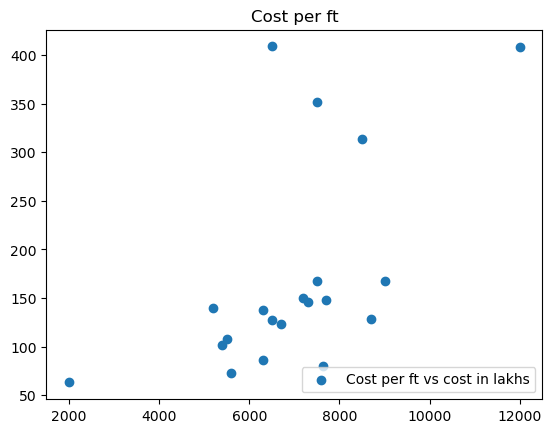

In [129]:
plt.scatter(df['Cost per ft'].head(20),df['Total Cost in Lakhs'].head(20),label="Cost per ft vs cost in lakhs")
plt.legend()
plt.title('Cost per ft')
#plt.ytitle('Total Cost in lakhs')
plt.show()

In [13]:
df.head(2)

,Name,BHK,Area in Sqft,Status,Place,Cost per ft,Total Cost in Lakhs
0,Theme Imperial,3,2090,Under Construction,Attapur,7200,150.0
1,Jains Jains Balaji Nilayam Casa Waterside,3,2245,Under Construction,Malkajgiri,7500,168.0


In [23]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs'],
      dtype='object')

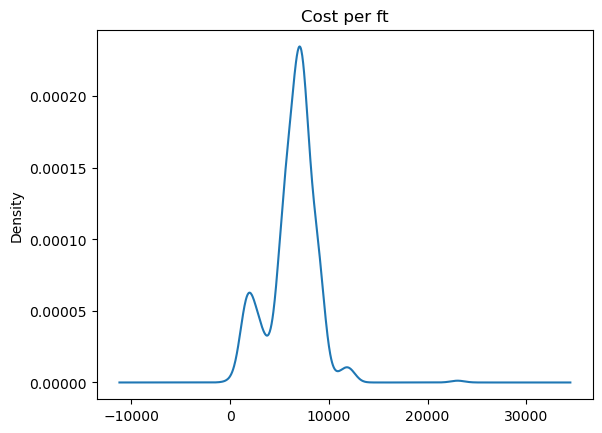

In [175]:
df['Cost per ft'].plot(kind='kde')
plt.title('Cost per ft')
plt.show()

In [131]:
df.columns

Index(['Name', 'Place', 'BHK', 'Area in Sqft', 'Cost per ft',
       'Total Cost in Lakhs', 'Status', 'Cost_status'],
      dtype='object')

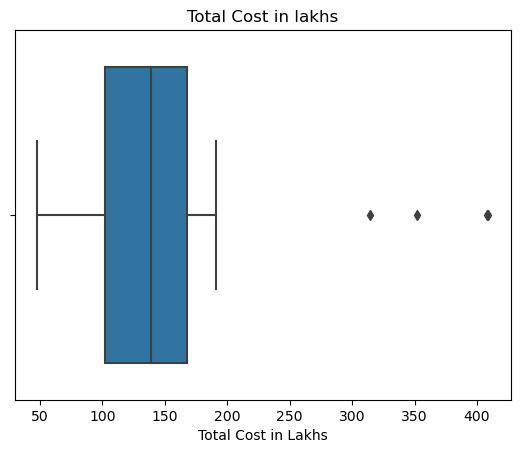

In [193]:
sns.boxplot(x=df['Total Cost in Lakhs'].head(30),data=df)
plt.title('Total Cost in lakhs')
plt.show()

<AxesSubplot:xlabel='Total Cost in Lakhs', ylabel='Cost_status'>

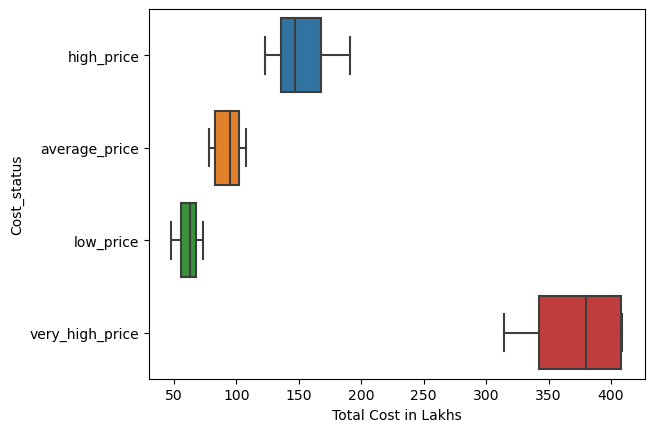

In [185]:
sns.boxplot(x=df['Total Cost in Lakhs'].head(30),y=df['Cost_status'].head(30),data=df)

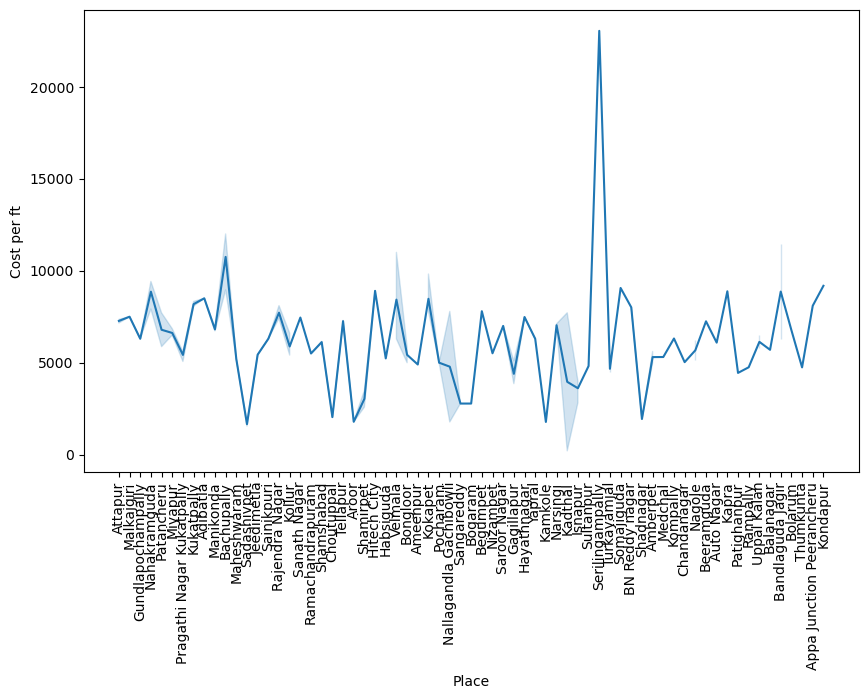

In [192]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Place',y='Cost per ft',data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

<AxesSubplot:xlabel='BHK', ylabel='Status'>

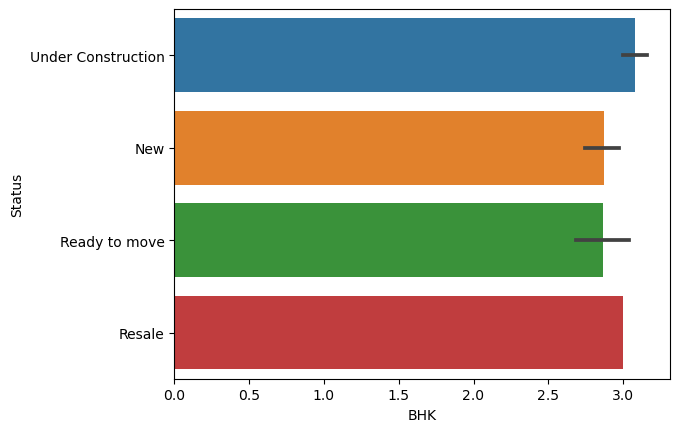

In [154]:

sns.barplot(x='BHK',y='Status',data=df)

<AxesSubplot:xlabel='Status', ylabel='Cost per ft'>

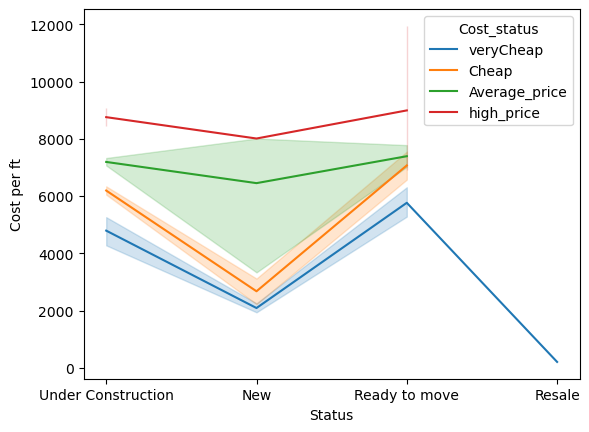

In [11]:
# here the lineplot to represent the cost per ft for different change of prices
sns.lineplot(x='Status',y='Cost per ft',hue='Cost_status',data=df)

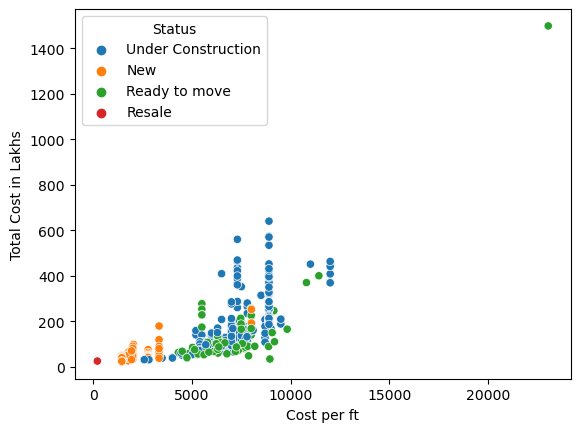

In [12]:
#from this plot i can understand the increaing of price range for different categories of Status.
sns.scatterplot(x='Cost per ft',y='Total Cost in Lakhs',hue='Status',data=df)
plt.show()

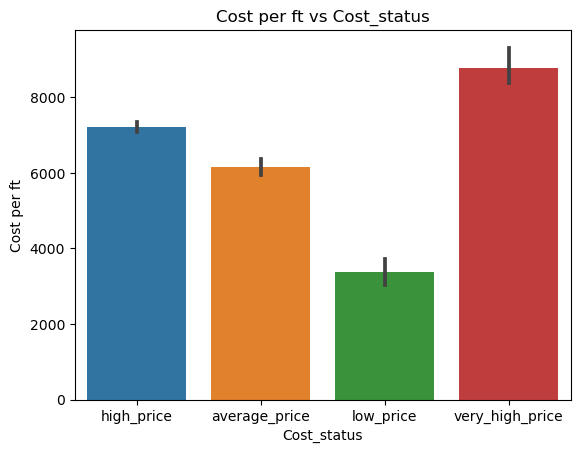

In [155]:
#Relationship between Cost_status and Cost per ft
sns.barplot(y='Cost per ft',x='Cost_status',data=df)
plt.title('Cost per ft vs Cost_status')
plt.show()

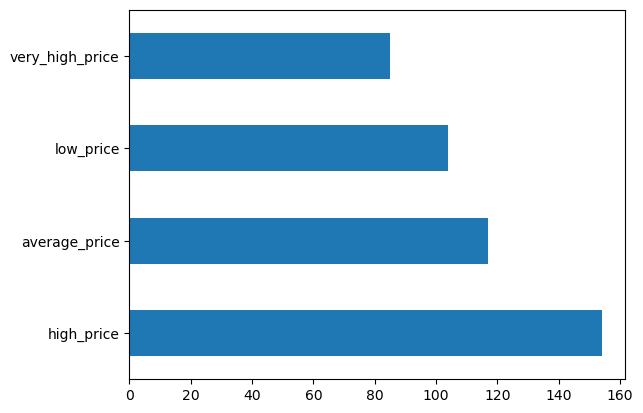

In [171]:
#Visualization of cost_status in pie chart, from this we can understand the status of cost in percentages
#df['Cost_status'].value_counts().plot.barh()
sns.barchart
plt.show()

In [27]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

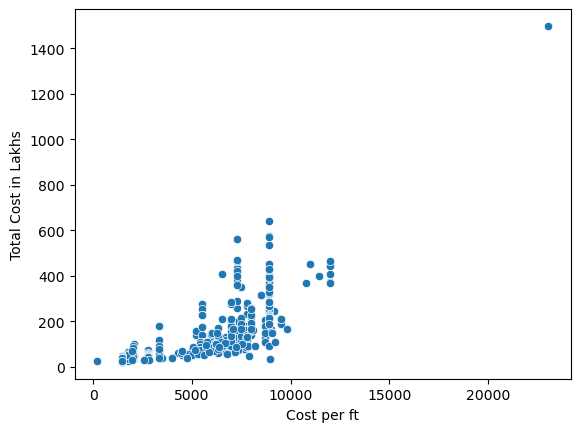

In [29]:
sns.scatterplot(x='Cost per ft',y='Total Cost in Lakhs',data=df)
plt.show()

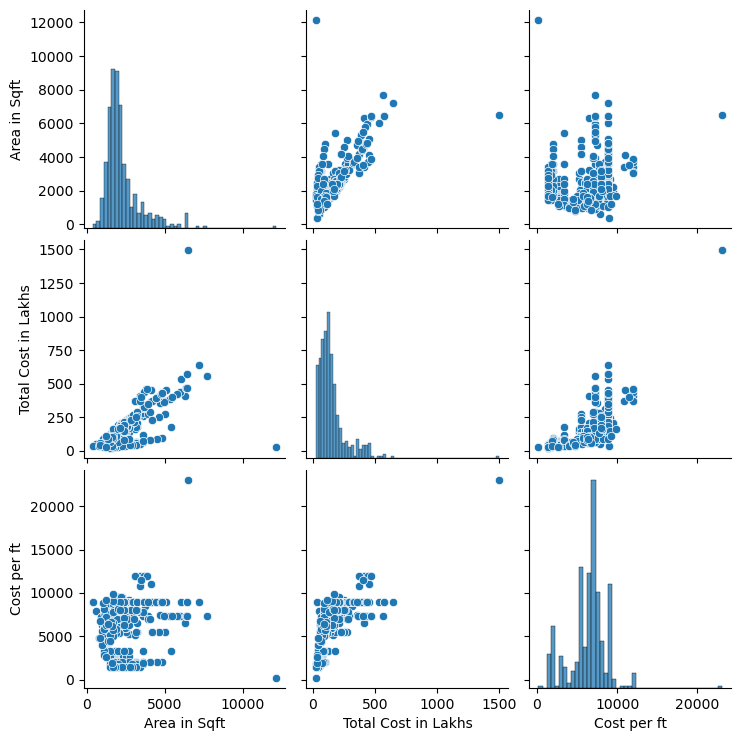

In [31]:
sns.pairplot(vars=['Area in Sqft','Total Cost in Lakhs','Cost per ft'],data=df)
plt.show()

In [33]:
df[['Area in Sqft','Total Cost in Lakhs','Cost per ft']].corr()

,Area in Sqft,Total Cost in Lakhs,Cost per ft
Area in Sqft,1.000000,0.724565,0.203042
Total Cost in Lakhs,0.724565,1.000000,0.718223
Cost per ft,0.203042,0.718223,1.000000


<AxesSubplot:>

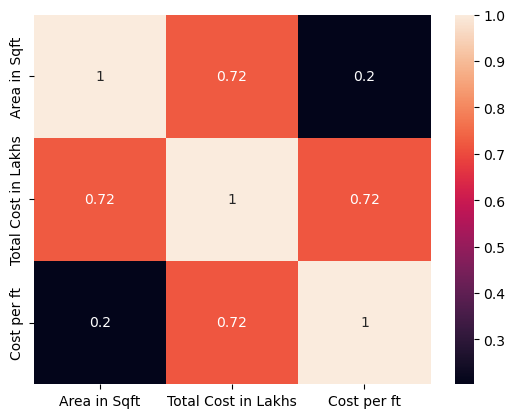

In [257]:
sns.heatmap(df[['Area in Sqft','Total Cost in Lakhs','Cost per ft']].corr(),annot=True)

In [44]:
df.groupby('Place')['Total Cost in Lakhs'].sum()

Place
Adibatla                     628.00
Amberpet                     106.00
Ameenpur                      50.00
Appa Junction Peerancheru    160.00
Aroor                        530.08
                              ...  
Thumkunta                     40.00
Turkayamjal                  126.00
Uppal Kalan                  214.00
Velmala                      769.00
Yapral                       449.25
Name: Total Cost in Lakhs, Length: 67, dtype: float64

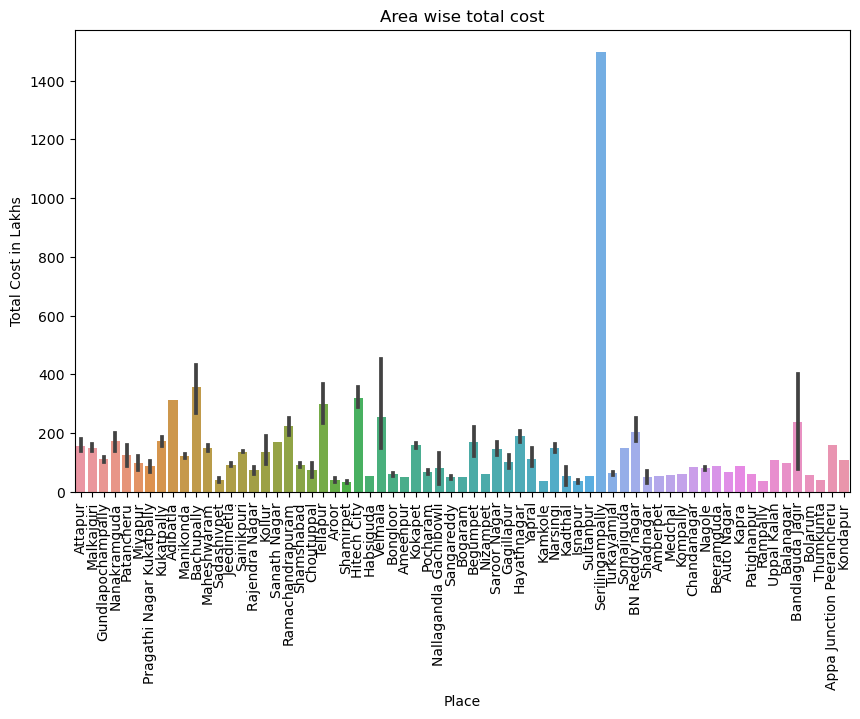

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='Place',y='Total Cost in Lakhs',data=df)
plt.title('Area wise total cost')
plt.xticks(rotation=90)
plt.show()

In [52]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

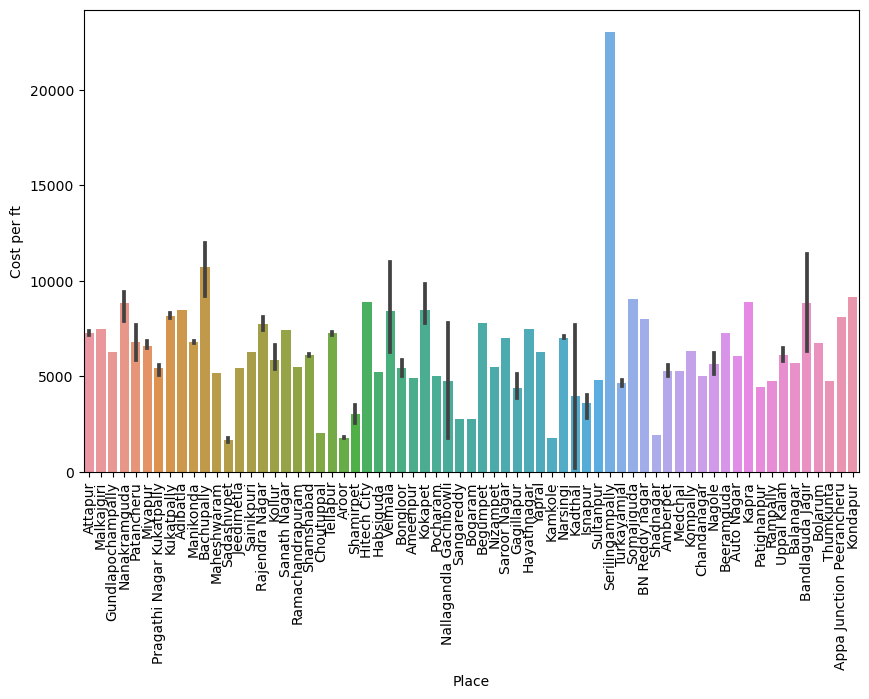

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='Place',y='Cost per ft',data=df)
plt.xticks(rotation=90)
plt.show()

In [55]:
df.columns

Index(['Name', 'BHK', 'Area in Sqft', 'Status', 'Place', 'Cost per ft',
       'Total Cost in Lakhs', 'Cost_status'],
      dtype='object')

In [136]:
df

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price
...,...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,Thumkunta,2,843,4744,40,Ready to move,low_price
456,Bhuvanteza Happy Homes II,Shamirpet,2,1200,2583,31,Under Construction,low_price
457,Indis PBEL City,Appa Junction Peerancheru,3,1976,8097,160,Under Construction,high_price
458,Mantoor Nandan Serenity,Velmala,3,2100,8000,168,Ready to move,high_price


In [57]:
df['Total Cost in Lakhs'].astype('int')

0      150
1      168
2       86
3      168
4      148
      ... 
455     40
456     31
457    160
458    168
459    110
Name: Total Cost in Lakhs, Length: 460, dtype: int32

In [145]:
df.groupby(['Place','BHK']).max()

Name  Area in Sqft  \
Place                     BHK                                                   
Adibatla                  4               IRA The Square Villas          3705   
Amberpet                  2    Swaraj Homes Sai Durga Residency          1060   
Ameenpur                  2            AV Lalitha Divine County          1020   
Appa Junction Peerancheru 3                     Indis PBEL City          1976   
Aroor                     3                Alekhya Amara County          3600   
...                                                         ...           ...   
Uppal Kalan               3                 Tricolour Palm Cove          1850   
Velmala                   3             Mantoor Nandan Serenity          2385   
                          4                         Hallmark 5A          4100   
Yapral                    2                      Omsree Delight          1390   
                          3                      Omsree Delight          2700   

                               Cost per ft  Total Cost in Lakhs  \
Place                     BHK                                     
Adibatla                  4           8500                  314   
Amberpet                  2           5608                   53   
Ameenpur                  2           4901                   50   
Appa Junction Peerancheru 3           8097                  160   
Aroor                     3           1904                   64   
...                                    ...                  ...   
Uppal Kalan               3           6484                  107   
Velmala                   3           8000                  168   
                          4          11000                  451   
Yapral                    2           6300                   87   
                          3           6300                  170   

                                           Status      Cost_status  
Place                     BHK                                       
Adibatla                  4    Under Construction  very_high_price  
Amberpet                  2    Under Construction        low_price  
Ameenpur                  2         Ready to move        low_price  
Appa Junction Peerancheru 3    Under Construction       high_price  
Aroor                     3                   New        low_price  
...                                           ...              ...  
Uppal Kalan               3         Ready to move    average_price  
Velmala                   3    Under Construction       high_price  
                          4    Under Construction  very_high_price  
Yapral                    2    Under Construction    average_price  
                          3    Under Construction       high_price  

[103 rows x 6 columns]

<AxesSubplot:xlabel='Status', ylabel='BHK'>

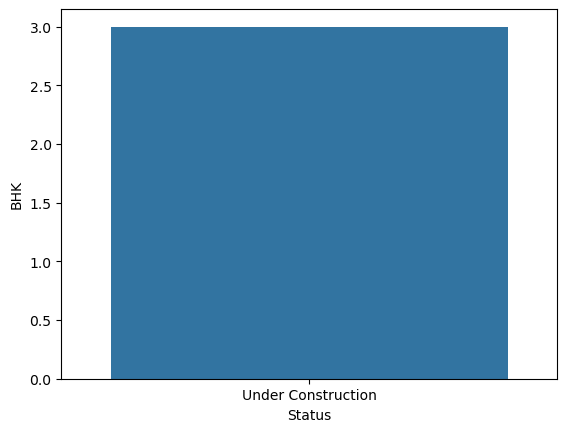

In [224]:
a=df[(df['BHK']==3)&(df['Status']=='Under Construction')]
sns.barplot(x='Status',y='BHK',data=a)

<AxesSubplot:xlabel='BHK', ylabel='Status'>

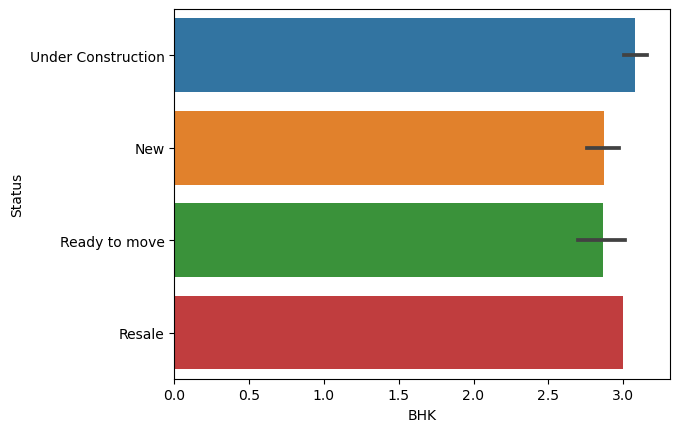

In [161]:
sns.barplot(x='BHK',y='Status',data=df)

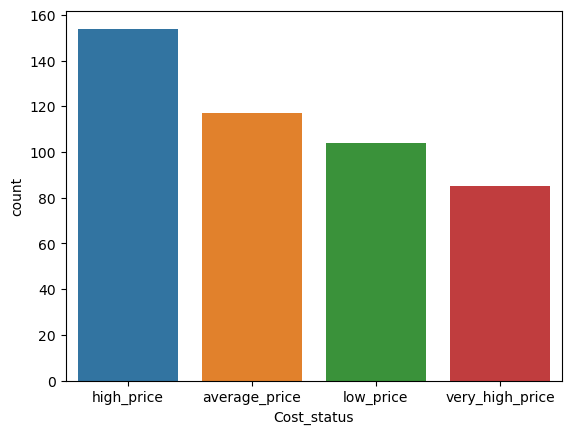

In [174]:
sns.countplot(x='Cost_status',data=df)
plt.show()

In [14]:
df

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price
...,...,...,...,...,...,...,...,...
455,Shree Anurag Sri Sai Anurag New Town Phase 2,Thumkunta,2,843,4744,40,Ready to move,low_price
456,Bhuvanteza Happy Homes II,Shamirpet,2,1200,2583,31,Under Construction,low_price
457,Indis PBEL City,Appa Junction Peerancheru,3,1976,8097,160,Under Construction,high_price
458,Mantoor Nandan Serenity,Velmala,3,2100,8000,168,Ready to move,high_price


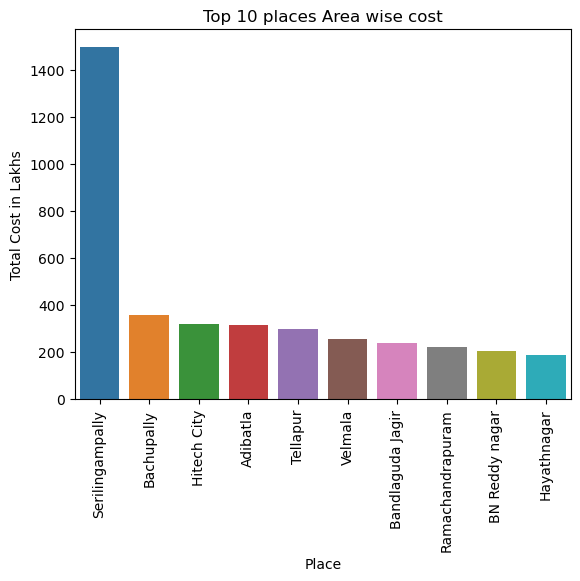

In [40]:
a=df.groupby('Place')['Total Cost in Lakhs'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Place',y='Total Cost in Lakhs',data=a)
plt.xticks(rotation=90)
plt.title('Top 10 places Area wise cost')
plt.show()

In [16]:
a=df.groupby('Name')['Cost per ft'].sum().sort_values(ascending=False).reset_index().head(5)
sns.barplot(x='Name',y='Cost per ft',hue='Cost_status',data=a)
plt.xticks(rotation=30)
plt.title('Top 5 projects')
plt.show()

ValueError: Could not interpret input 'Cost_status'

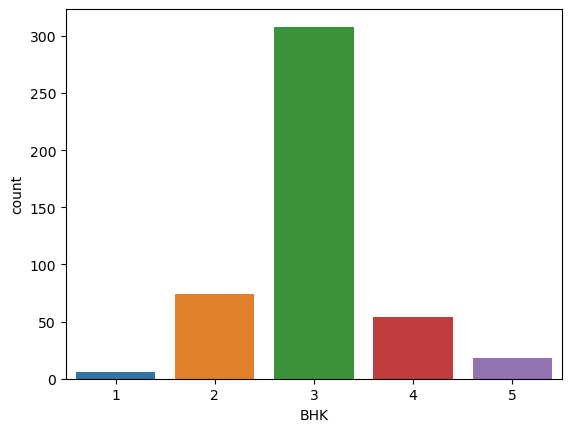

In [180]:
sns.countplot(x='BHK',data=df)
plt.show()

In [207]:
df.columns

Index(['Name', 'Place', 'BHK', 'Area in Sqft', 'Cost per ft',
       'Total Cost in Lakhs', 'Status', 'Cost_status'],
      dtype='object')

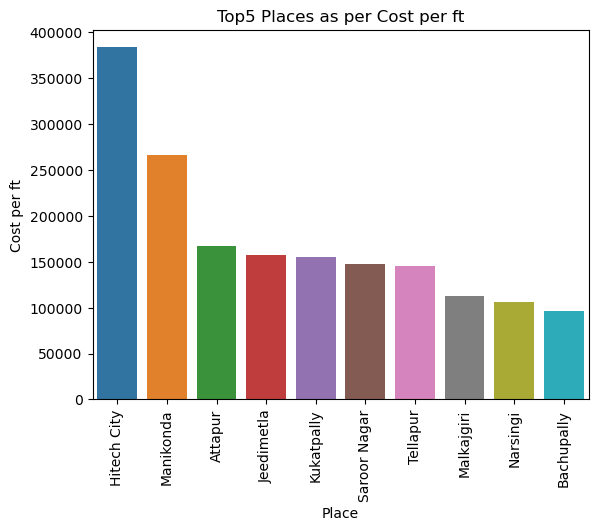

In [21]:
b=df.groupby('Place')['Cost per ft'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Place',y='Cost per ft',data=b)
plt.xticks(rotation=90)
plt.title('Top5 Places as per Cost per ft')
plt.show()

In [251]:
df.groupby('Place')['Cost per ft'].sum().sort_values(ascending=False).reset_index().head(10)

,Place,Cost per ft
0,Hitech City,382948
1,Manikonda,265580
2,Attapur,167229
3,Jeedimetla,157600
4,Kukatpally,155495
5,Saroor Nagar,146979
6,Tellapur,145181
7,Malkajgiri,112500
8,Narsingi,105541
9,Bachupally,96767


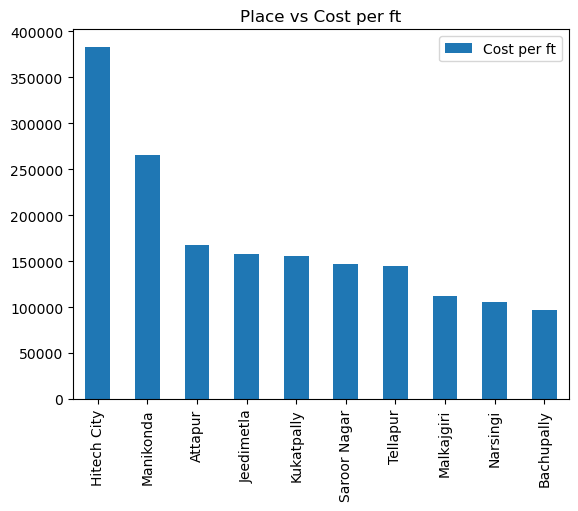

In [254]:
df.groupby('Place')['Cost per ft'].sum().sort_values(ascending=False).reset_index().head(10).plot(kind='bar')
plt.title("Place vs Cost per ft")
plt.xticks(ticks=range(0,10), labels = ["Hitech City",'Manikonda','Attapur','Jeedimetla','Kukatpally','Saroor Nagar','Tellapur','Malkajgiri','Narsingi','Bachupally'], rotation=90)
plt.show()


In [227]:
df.columns

Index(['Name', 'Place', 'BHK', 'Area in Sqft', 'Cost per ft',
       'Total Cost in Lakhs', 'Status', 'Cost_status'],
      dtype='object')

<AxesSubplot:ylabel='Status'>

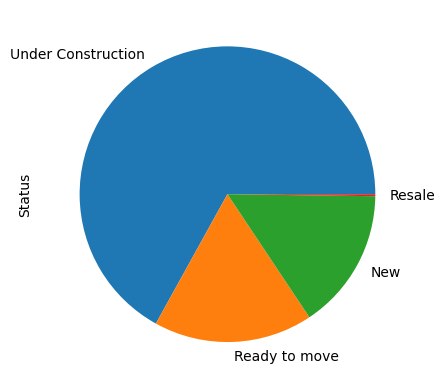

In [234]:
df['Status'].value_counts(normalize=True).sort_values(ascending=False).head(5).plot.pie()

TypeError: 'str' object is not callable

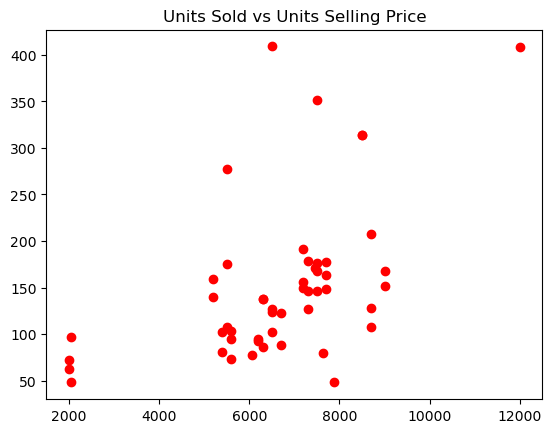

In [247]:
plt.scatter(df['Cost per ft'].head(50),df['Total Cost in Lakhs'].head(50), color='red')
plt.title("Units Sold vs Units Selling Price")
plt.xlabel('Cost per ft')
plt.ylabel("Total Cost in Lakhs")
plt.show()

In [41]:
df.head()

,Name,Place,BHK,Area in Sqft,Cost per ft,Total Cost in Lakhs,Status,Cost_status
0,Theme Imperial,Attapur,3,2090,7200,150,Under Construction,high_price
1,Jains Jains Balaji Nilayam Casa Waterside,Malkajgiri,3,2245,7500,168,Under Construction,high_price
2,Omsree Gallaxy,Gundlapochampally,3,1376,6302,86,Under Construction,average_price
3,Pioneer Developers Hyderabad ASBL Loft,Nanakramguda,3,1870,9003,168,Under Construction,high_price
4,Elemental Village,Patancheru,4,1930,7700,148,Under Construction,high_price


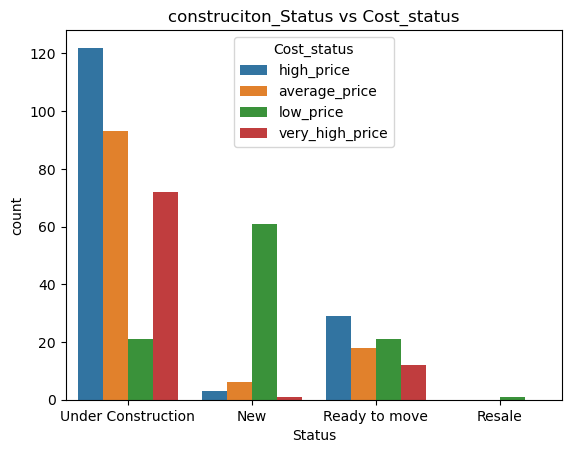

In [48]:
sns.countplot(x='Status',hue='Cost_status',data=df)
plt.title('construciton_Status vs Cost_status')
plt.show()

<AxesSubplot:ylabel='Cost_status'>

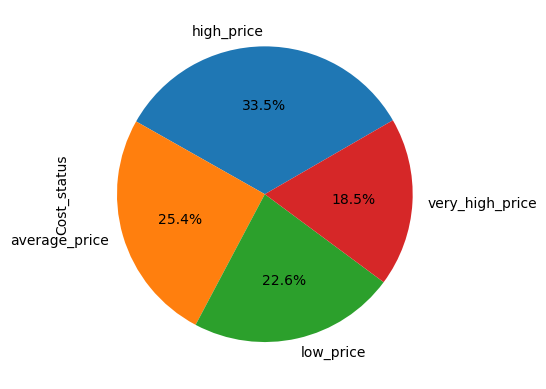

In [52]:
df['Cost_status'].value_counts().plot.pie(autopct="%1.1f%%", startangle=30)